
# Parallel Betweenness

Example of parallel implementation of betweenness centrality using the
multiprocessing module from Python Standard Library.

The function betweenness centrality accepts a bunch of nodes and computes
the contribution of those nodes to the betweenness centrality of the whole
network. Here we divide the network in chunks of nodes and we compute their
contribution to the betweenness centrality of the whole network.

Note: The example output below shows that the non-parallel implementation is
faster. This is a limitation of our CI/CD pipeline running on a single core.

Depending on your setup, you will likely observe a speedup.


In [1]:
import sys
sys.path.insert(1, '/home/mauricio/code/mcr')
from mcr.nx import betweenness_centrality_parallel
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('dark_background')

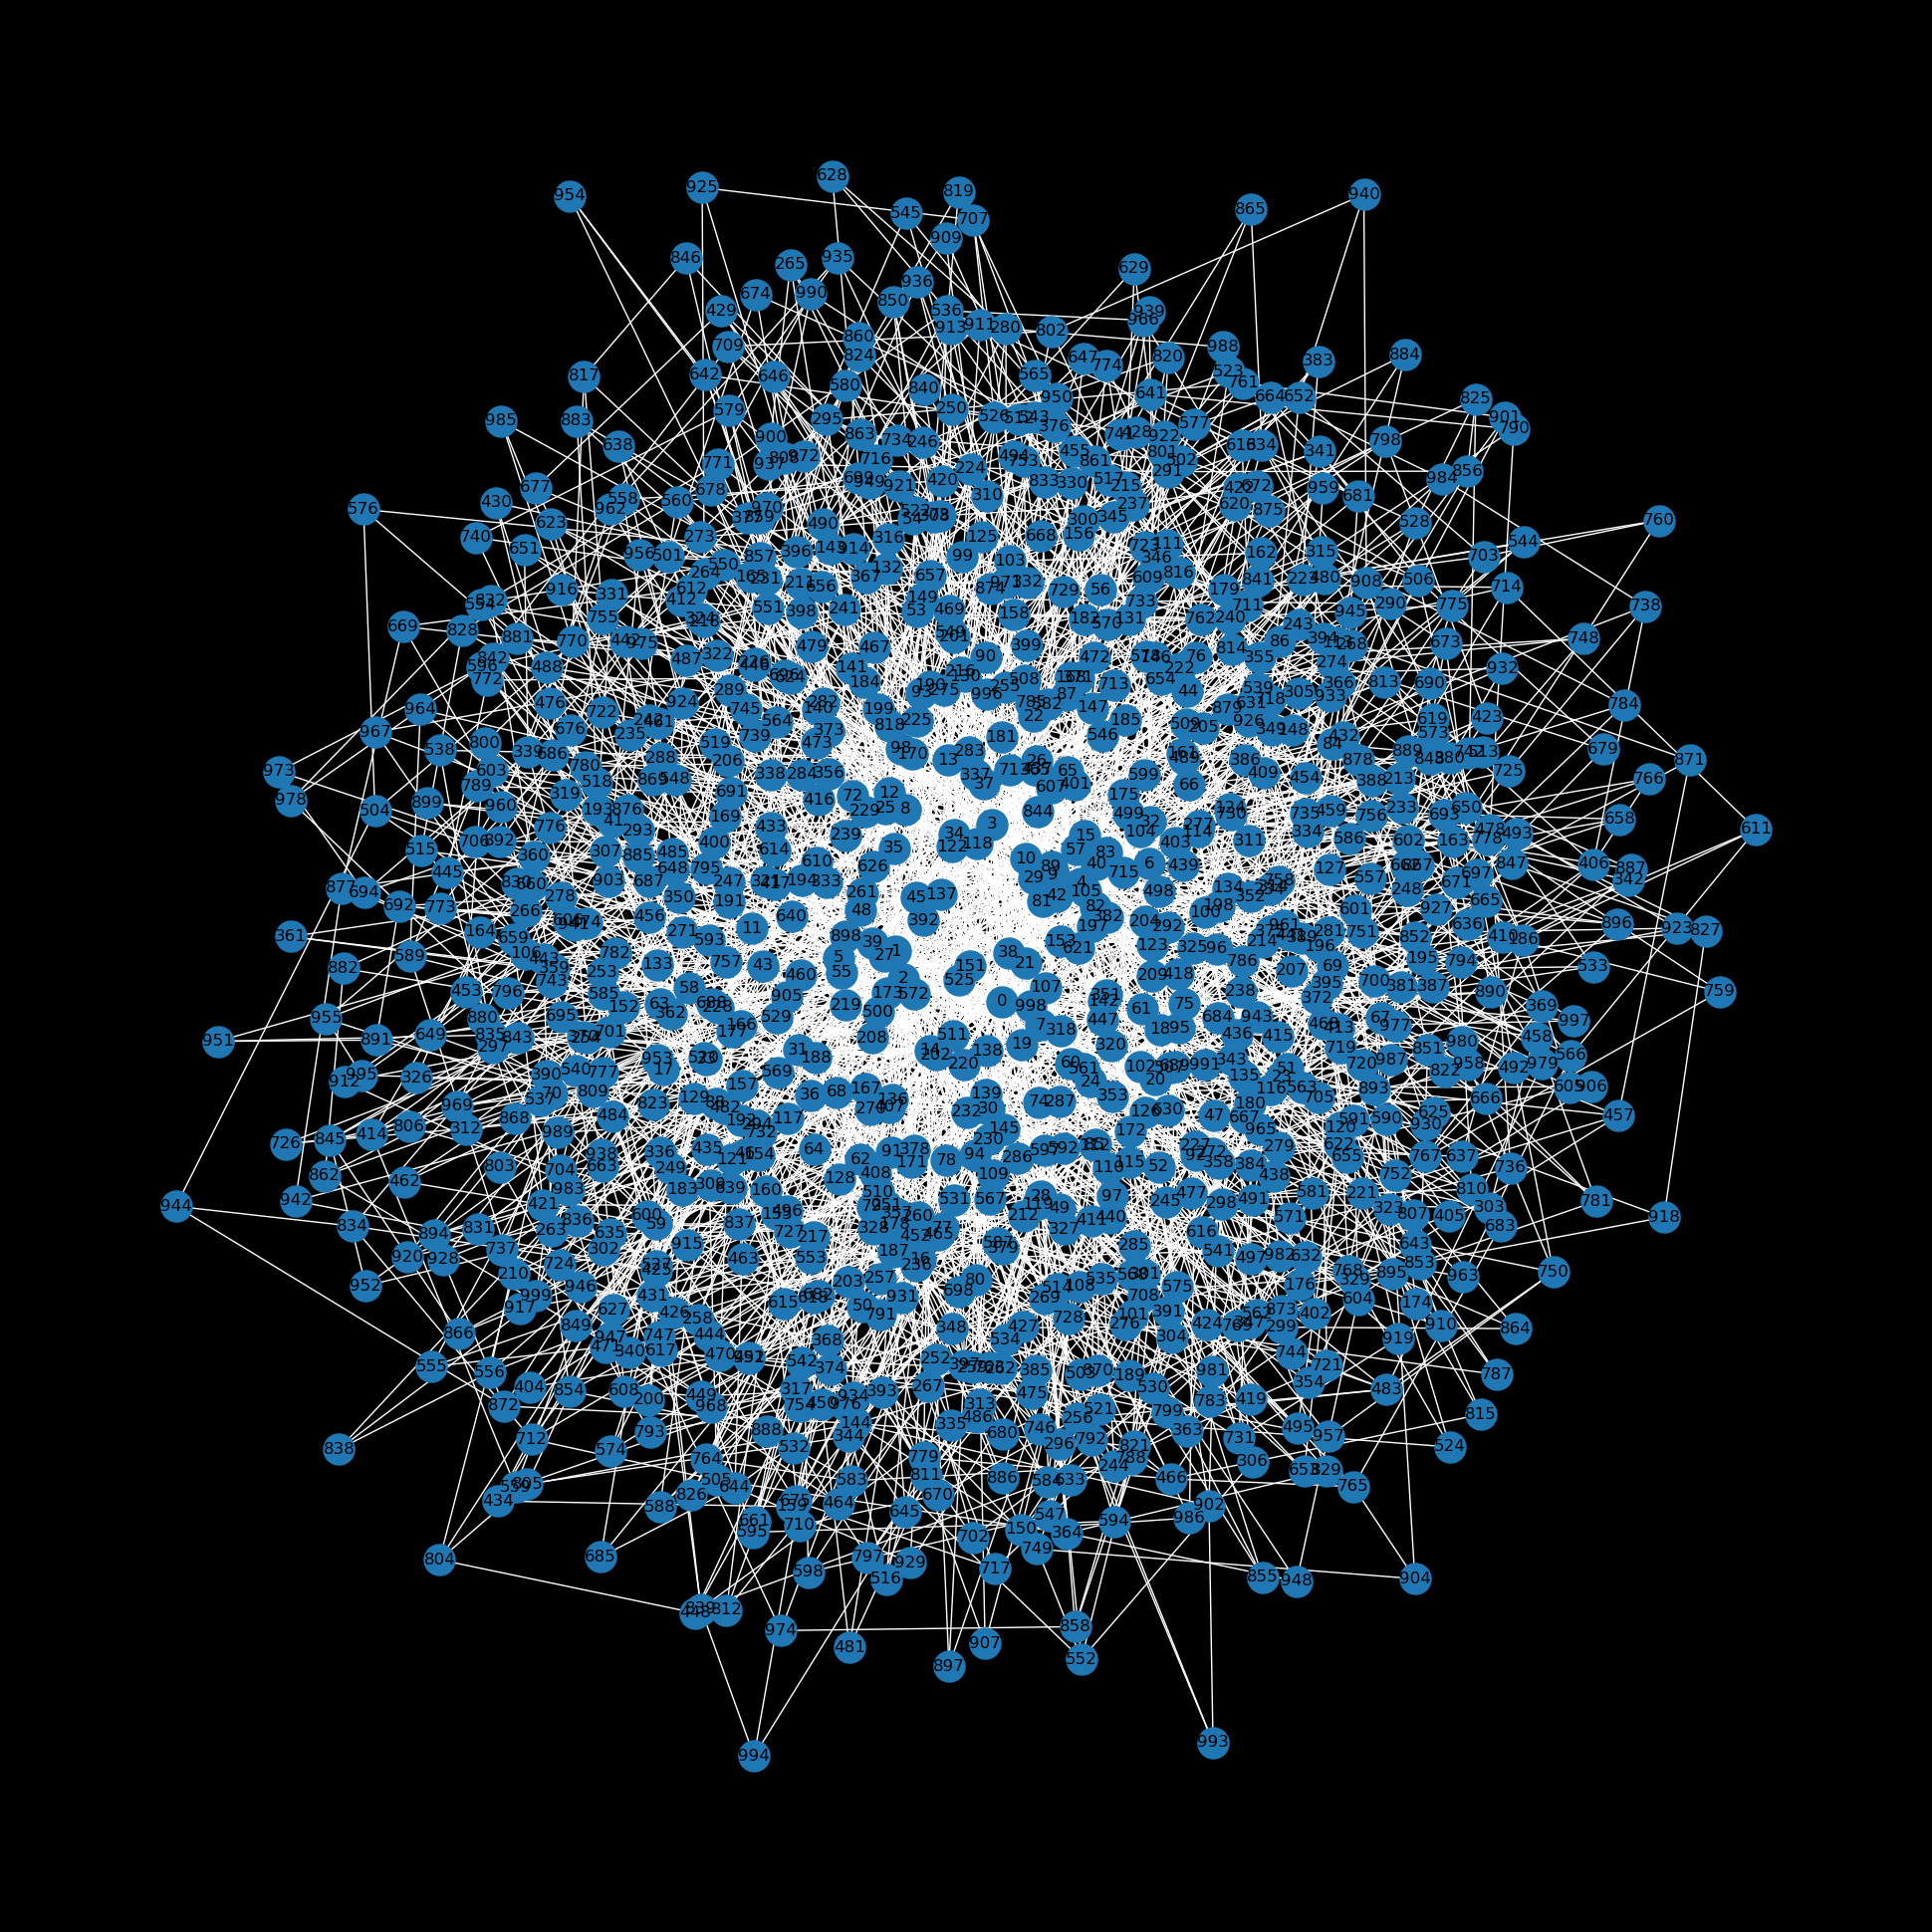

In [2]:
G_ba = nx.barabasi_albert_graph(1000, 3)
fig = plt.figure(figsize=(19.2, 19.2))
nx.draw(G_ba, node_size=500, with_labels=True, edge_color='white')
fig.set_facecolor('black')

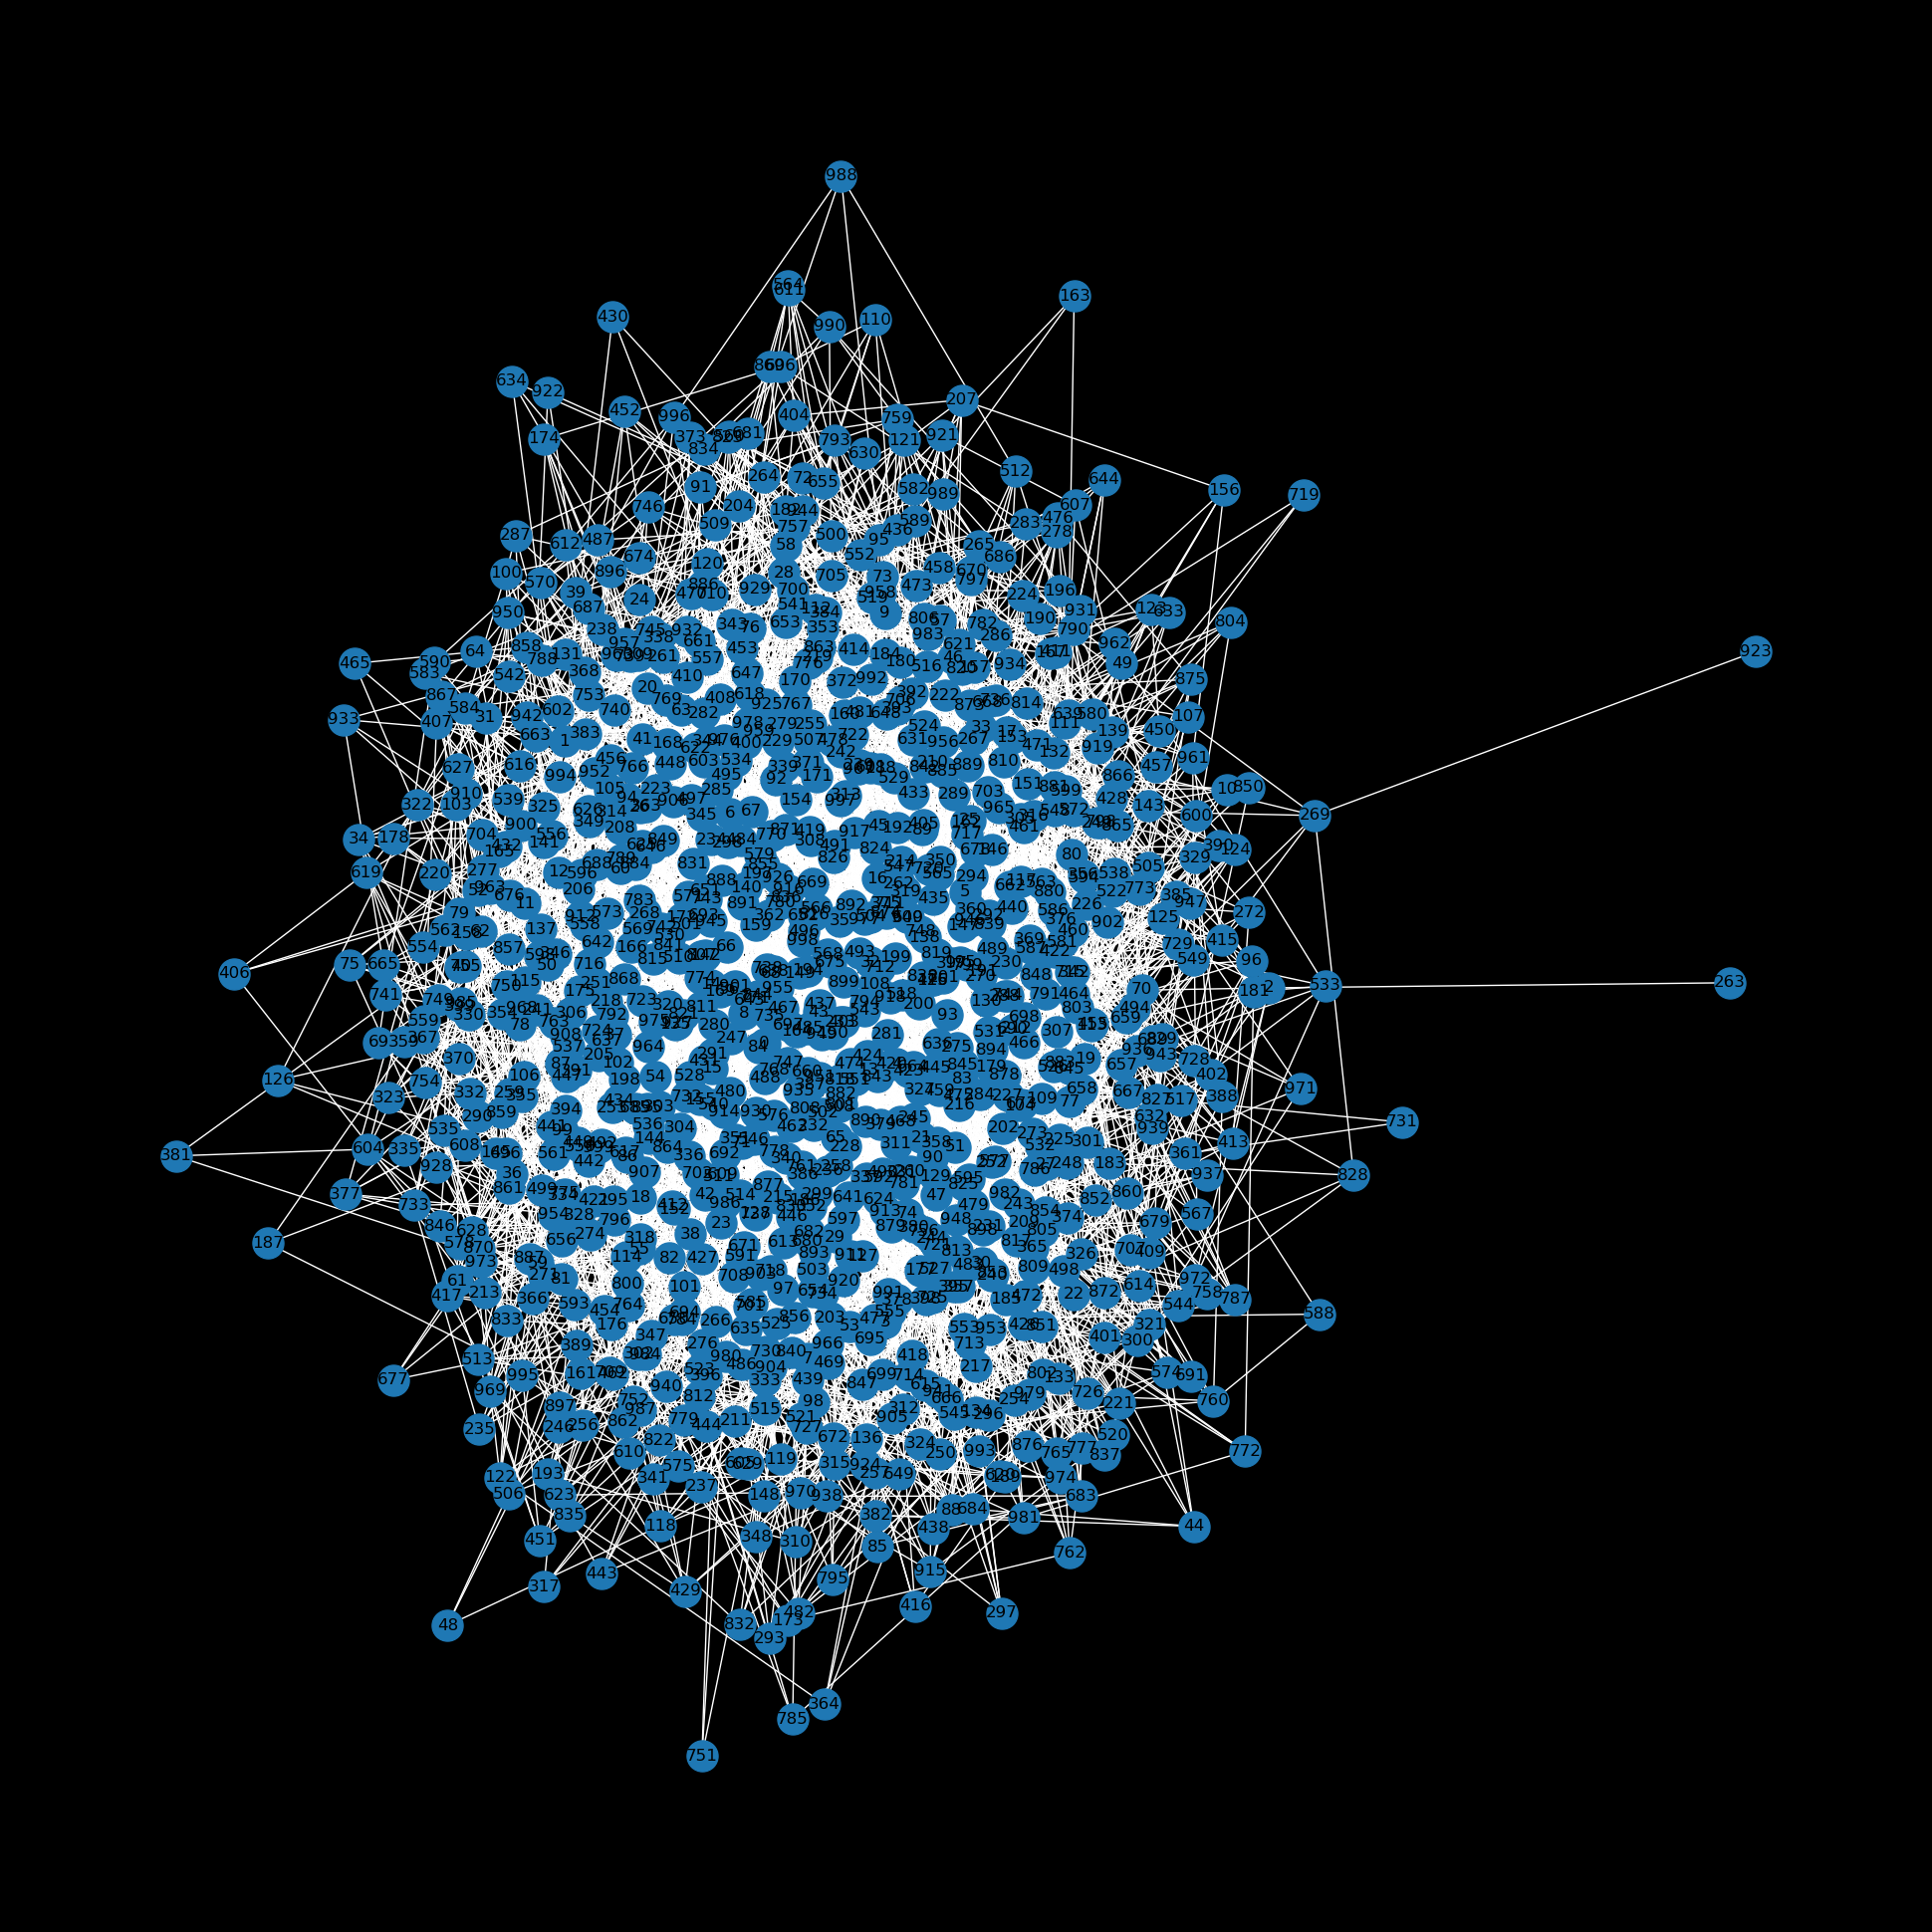

In [3]:
G_er = nx.gnp_random_graph(1000, 0.01)
fig = plt.figure(figsize=(19.2, 19.2))
nx.draw(G_er, node_size=500, with_labels=True, edge_color='white')
fig.set_facecolor('black')

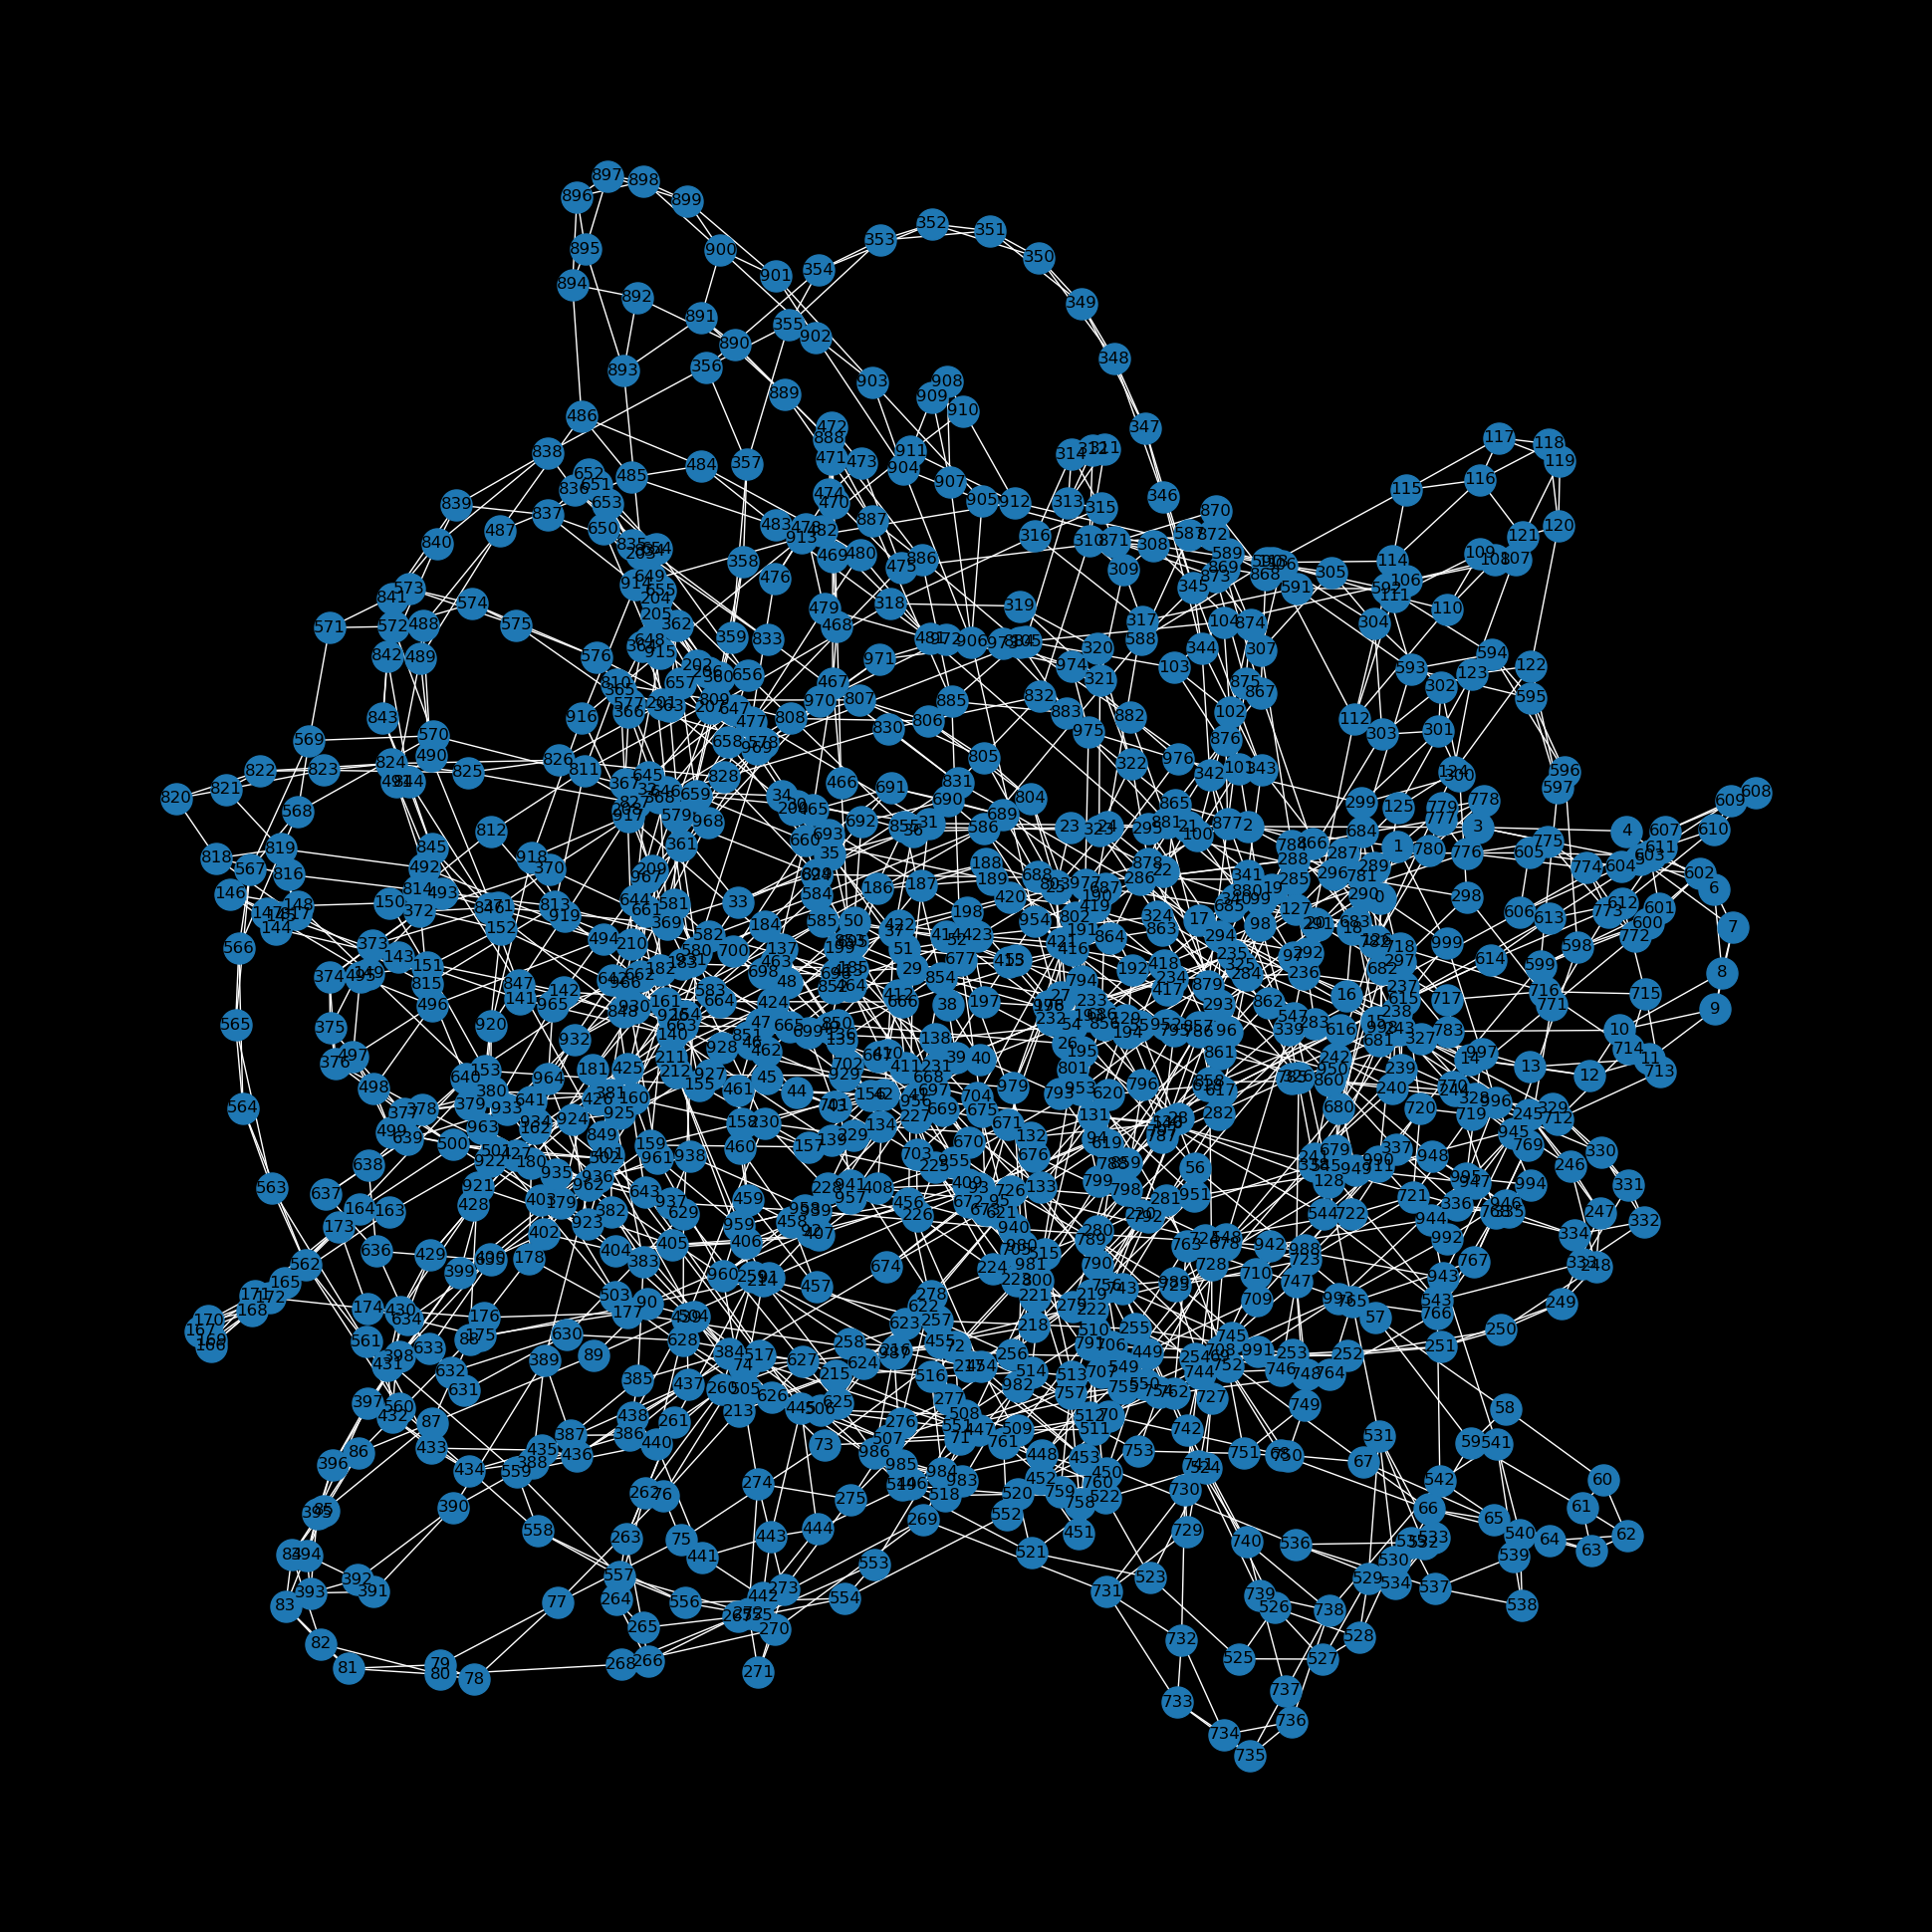

In [4]:
G_ws = nx.connected_watts_strogatz_graph(1000, 4, 0.1)
fig = plt.figure(figsize=(19.2, 19.2))
nx.draw(G_ws, node_size=500, with_labels=True, edge_color='white')
fig.set_facecolor('black')
plt.show()

In [6]:
import time
for G in [G_ba, G_er, G_ws]:
    print("")
    print("Computing betweenness centrality for:")
    print(G)
    print("\tParallel version")
    start = time.time()
    bt = betweenness_centrality_parallel(G)
    print(f"\t\tTime: {(time.time() - start):.4F} seconds")
    print(f"\t\tBetweenness centrality for node 0: {bt[0]:.5f}")
    print("\tNon-Parallel version")
    start = time.time()
    bt = nx.betweenness_centrality(G)
    print(f"\t\tTime: {(time.time() - start):.4F} seconds")
    print(f"\t\tBetweenness centrality for node 0: {bt[0]:.5f}")
print("")


Computing betweenness centrality for:
Graph with 1000 nodes and 2991 edges
	Parallel version
		Time: 0.4790 seconds
		Betweenness centrality for node 0: 0.11608
	Non-Parallel version
		Time: 1.4949 seconds
		Betweenness centrality for node 0: 0.11608

Computing betweenness centrality for:
Graph with 1000 nodes and 4861 edges
	Parallel version
		Time: 0.3597 seconds
		Betweenness centrality for node 0: 0.00165
	Non-Parallel version
		Time: 1.8414 seconds
		Betweenness centrality for node 0: 0.00165

Computing betweenness centrality for:
Graph with 1000 nodes and 2000 edges
	Parallel version
		Time: 0.3082 seconds
		Betweenness centrality for node 0: 0.00295
	Non-Parallel version
		Time: 1.3108 seconds
		Betweenness centrality for node 0: 0.00295

